## Enrichment analysis in proteins associated with either invadosome or lamellipodia

In [9]:
import pickle

import numpy as np
import networkx as nx
import pandas as pd

import scipy.stats as st

import matplotlib.pyplot as plt
from matplotlib_venn import venn3

In [14]:
def formatvenn(v,c1,c2,c3):
    c = v.get_patch_by_id(c1).get_facecolor()
    v.get_label_by_id('A').set_color(c)
    v.get_label_by_id('A').set_alpha(1)
    v.get_label_by_id('A').set_size(18)
    c = v.get_patch_by_id(c2).get_facecolor()
    v.get_label_by_id('B').set_color(c)
    v.get_label_by_id('B').set_alpha(1)
    v.get_label_by_id('B').set_size(18)
    c = v.get_patch_by_id(c3).get_facecolor()
    v.get_label_by_id('C').set_color(c)
    v.get_label_by_id('C').set_alpha(1)
    v.get_label_by_id('C').set_size(18)
    for i in ['0','1']:
        for j in ['0','1']:
            for k in ['0','1']:
                if i+j+k != '000' and v.get_label_by_id(i+j+k) != None :
                    v.get_label_by_id(i+j+k).set_size(18)

def vennG(wholef,subf,name,side='CIBN'):
    wholeG = nx.read_gml(wholef)
    subG = nx.read_gml(subf)
    invad = set([k for k,v in nx.get_node_attributes(wholeG,'Invadosome').items() if v])
    focad = set([k for k,v in nx.get_node_attributes(wholeG,'FocalAdhesion').items() if v])
    targets = set([k for k,v in nx.get_node_attributes(wholeG,'Targets').items() if v])
    whole = set(wholeG.nodes)
    f,ax = plt.subplots(1,2,figsize=(20,10))
    v1 = venn3([invad,focad,whole],set_labels=('Invadosome','FocalAdhesion','Whole'),ax=ax[0])
    formatvenn(v1,'101','011','001')
    ax[0].set_title(f"Whole {name}",size=18)
    
    subp = set(subG.nodes)
    v2 = venn3([invad,focad,subp],set_labels=('Invadosome','FocalAdhesion','In prediction'),ax=ax[1])
    formatvenn(v2,'100','010','001')
    ax[1].set_title(f"OBi-RWR predictions on {name}",size=18)
    enrich(wholef,subf,v2,side)
    return f

def enrich(wholef,subf,v,side):
    wholeG = nx.read_gml(wholef)
    subG = nx.read_gml(subf)
    invad = set([k for k,v in nx.get_node_attributes(wholeG,'Invadosome').items() if v])
    focad = set([k for k,v in nx.get_node_attributes(wholeG,'FocalAdhesion').items() if v])
    targets = set([k for k,v in nx.get_node_attributes(wholeG,'Targets').items() if v])
    whole = set(wholeG.nodes)
    diff = whole.difference(invad.union(focad))
    subp = set(subG.nodes)
    
    k = len(subp.intersection(invad.difference(focad)))
    n = len(subp)
    p = len(invad.difference(focad))/len(whole)
    if side == 'CIBN':
        res = st.binomtest(k,n,p,alternative='less')
    else:
        res = st.binomtest(k,n,p,alternative='greater')
        
    if res.pvalue < 5e-2:
        v.get_label_by_id('101').set_color('red')
    
    k = len(subp.intersection(invad.intersection(focad)))
    n = len(subp)
    p = len(invad.intersection(focad))/len(whole)
    res = st.binomtest(k,n,p,alternative='greater')
    if res.pvalue < 5e-2:
        v.get_label_by_id('111').set_color('red')
    
    k = len(subp.intersection(focad.difference(invad)))
    n = len(subp)
    p = len(focad.difference(invad))/len(whole)
    if side == 'CIBN':
        res = st.binomtest(k,n,p,alternative='greater')
    else:
        res = st.binomtest(k,n,p,alternative='less')
    if res.pvalue < 5e-2:
        v.get_label_by_id('011').set_color('red')
    
    

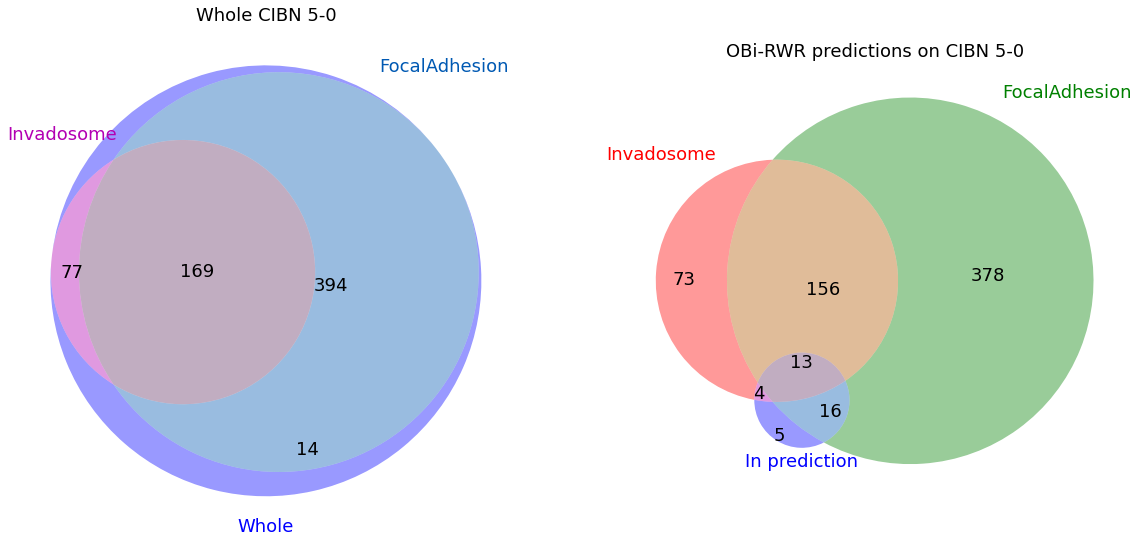

In [21]:
wholef = "../05_Output/CIBN/signor_subgraph_CIBNB5 - B0.gml"
subf = "../05_Output/CIBN/random_B5 - B0/paths_CIBN_B5 - B0.gml"
f = vennG(wholef,subf,'CIBN 5-0',side='CIBN')
f.savefig('../05_Output/CIBN/CIBN_venn_T5.png', dpi = 450)

 __Figure on the left:__
 Overview of the whole PPI network used (see ... for procedure to build the PPI networks). Proteins are either : detected in MS in Invadosomes or Focal Adhesions, or they are differentially phosphorylated in the CIBN experiment and not previously identified as being part of neither invadosomes nor focal adhesions. This is why the 'Whole' is slightly bigger than the combination of the two parts.
 
 __Figure on the right:__
 We are looking at the prediction of OBRWR using the differentially phosphorylated proteins in the OS+CIBN experiments which exhibit lamellipodia formation. We are therefore interested in an overrepresentation of proteins associated uniquely with focal adhesions or which are associated with both phenotypes. We also look at the depletion in proteins associated with invadosomes. Numbers in red show the significance of a single-sided binomial test, the direction of which depends on the aforementionned type of enrichment/depletion that we are seeking.
 
 In this case, there is no significant enrichment or depletion.




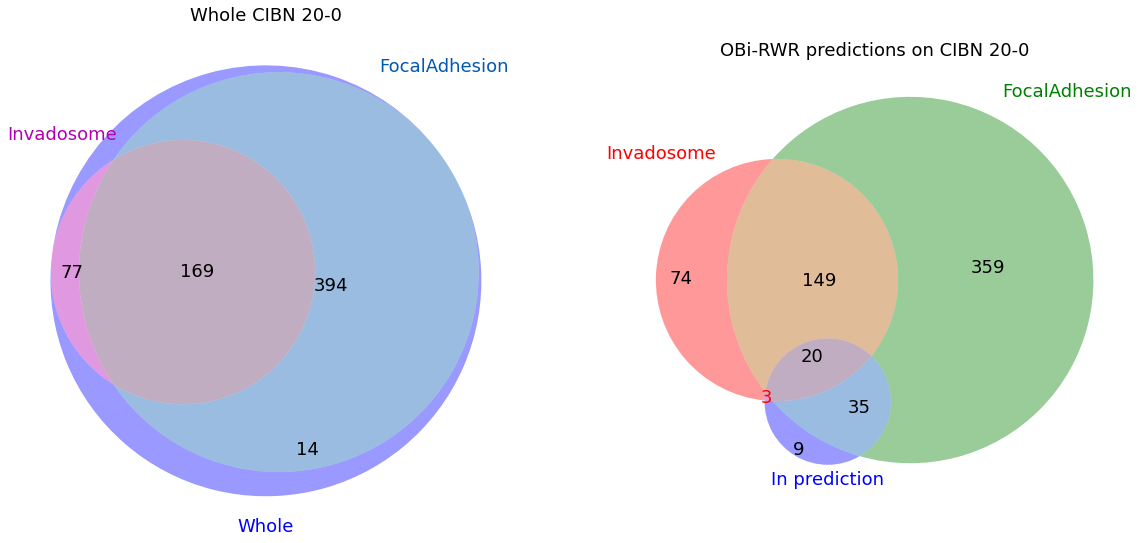

In [22]:
wholef = "../05_Output/CIBN/signor_subgraph_CIBNB20 - B0.gml"
subf = "../05_Output/CIBN/random_B20 - B0/paths_CIBN_B20 - B0.gml"
v = vennG(wholef,subf,'CIBN 20-0', 'CIBN')
v.savefig('../05_Output/CIBN/CIBN_venn_T20.png', dpi = 450)

 __Figure on the left:__
 Overview of the whole PPI network used (see ... for procedure to build the PPI networks). Proteins are either : detected in MS in Invadosomes or Focal Adhesions, or they are differentially phosphorylated in the CIBN experiment and not previously identified as being part of neither invadosomes nor focal adhesions. This is why the 'Whole' is slightly bigger than the combination of the two parts.
 
 __Figure on the right:__
 We are looking at the prediction of OBRWR using the differentially phosphorylated proteins in the OS+CIBN experiments which exhibit lamellipodia formation. We are therefore interested in an overrepresentation of proteins associated uniquely with focal adhesions or which are associated with both phenotypes. We also look at the depletion in proteins associated with invadosomes. Numbers in red show the significance of a single-sided binomial test, the direction of which depends on the aforementionned type of enrichment/depletion that we are seeking.
 
 In this case, there is a depletion in Invadosome only proteins, consistant with the experiment.




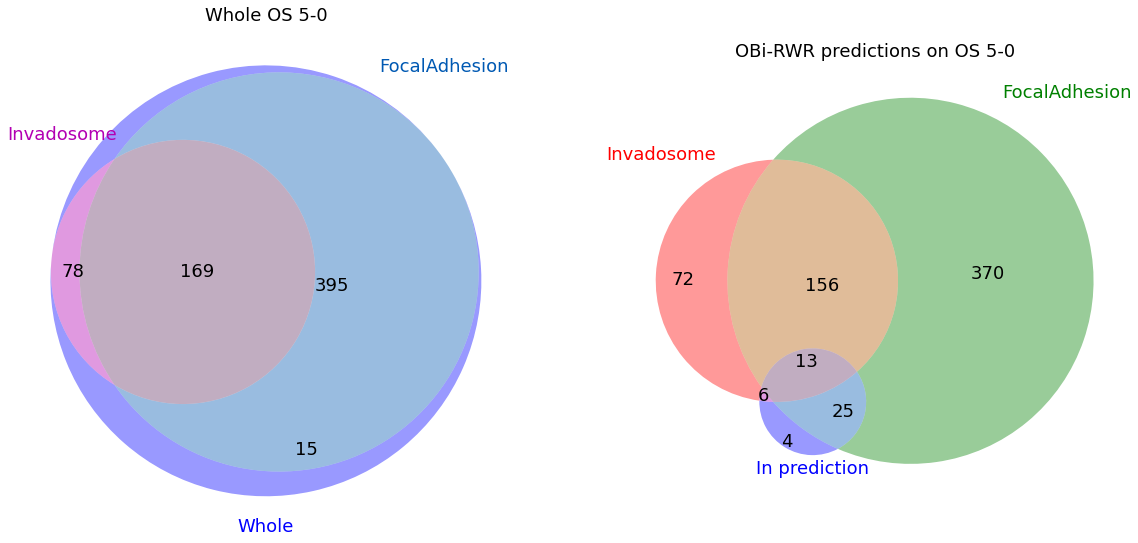

In [23]:
wholef = "../05_Output/OS/signor_subgraph_OSA5 - A0.gml"
subf = "../05_Output/OS/random_A5 - A0/paths_OS_A5 - A0.gml"
v = vennG(wholef,subf,'OS 5-0', 'OS')
v.savefig('../05_Output/OS/OS_venn_T5.png', dpi = 450)

 __Figure on the left:__
 Overview of the whole PPI network used (see ... for procedure to build the PPI networks). Proteins are either : detected in MS in Invadosomes or Focal Adhesions, or they are differentially phosphorylated in the CIBN experiment and not previously identified as being part of neither invadosomes nor focal adhesions. This is why the 'Whole' is slightly bigger than the combination of the two parts.
 
 __Figure on the right:__
 We are looking at the prediction of OBRWR using the differentially phosphorylated proteins in the OS only experiments which exhibit invadosome formation. We are therefore interested in an overrepresentation of proteins associated uniquely with Invadosomes or which are associated with both phenotypes. We also look at the depletion in proteins associated with lamellipodia (MS detection in focal adhesion). Numbers in red show the significance of a single-sided binomial test, the direction of which depends on the aforementionned type of enrichment/depletion that we are seeking.
 
 In this case, there is no significant enrichment or depletion.


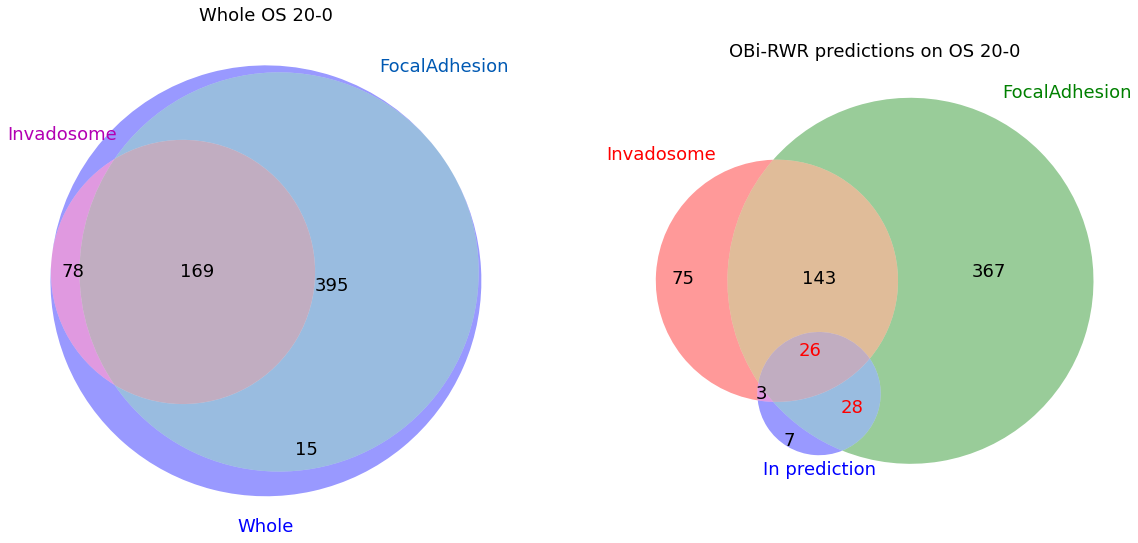

In [24]:
wholef = "../05_Output/OS/signor_subgraph_OSA20 - A0.gml"
subf = "../05_Output/OS/random_A20 - A0/paths_OS_A20 - A0.gml"
v = vennG(wholef,subf,'OS 20-0', 'OS')
v.savefig('../05_Output/OS/OS_venn_T20.png', dpi = 450)

 __Figure on the left:__
 Overview of the whole PPI network used (see ... for procedure to build the PPI networks). Proteins are either : detected in MS in Invadosomes or Focal Adhesions, or they are differentially phosphorylated in the CIBN experiment and not previously identified as being part of neither invadosomes nor focal adhesions. This is why the 'Whole' is slightly bigger than the combination of the two parts.
 
 __Figure on the right:__
 We are looking at the prediction of OBRWR using the differentially phosphorylated proteins in the OS only experiments which exhibit invadosome formation. We are therefore interested in an overrepresentation of proteins associated uniquely with Invadosomes or which are associated with both phenotypes. We also look at the depletion in proteins associated with lamellipodia (MS detection in focal adhesion). Numbers in red show the significance of a single-sided binomial test, the direction of which depends on the aforementionned type of enrichment/depletion that we are seeking.
 
 In this case, there is a significant enrichment in proteins which are associated to both Invadosome and Focal Adhesion, as well as a depletion in focal adhesion proteins. This is consistent with the experimental results.
